# Municipality Geoanalysis

In [32]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df_B_M = pd.read_csv('datos_sinnorm_sinimput.csv') 
df_B_M = df_B_M.loc[:, ~df_B_M.columns.str.contains('^Unnamed')]
df_B_M.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,medellin
0,4/23/2019,9/14/2018,6.250242,-75.588402,NaN,3.0,250,21.023370,Casa,221,1
1,4/10/2019,9/14/2018,4.736885,-74.023945,NaN,3.0,72,19.879296,Casa,208,0
2,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,134,19.519293,Casa,11,1
3,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,588,19.701615,Casa,11,1
4,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,160,20.125429,Casa,11,1


In [34]:
df_B_M.shape

(77205, 11)

# Data Cleaning - Filtering Medellin located uniquely

In [35]:
df_M = df_B_M.loc[df_B_M['medellin'] == 1]
print('Data marked as belonging to Medellin: ', df_M.shape[0])
df_M = df_M.dropna(subset = ['lat', 'lon'])
print('Data that has coordinates: ', df_M.shape[0])

Data marked as belonging to Medellin:  25093
Data that has coordinates:  18988


In [36]:
# Outliers Elimination
df_M = df_M.loc[df_M['lat'] >= 6.1]
df_M = df_M.loc[df_M['lat'] <= 6.4]
df_M = df_M.loc[df_M['lon'] >= -75.71034908]
df_M = df_M.loc[df_M['lon'] <= -75.4]

In [37]:
# Creating the GeoDataFrame using the coordinates available
gdf_geom = gpd.GeoDataFrame(df_M.copy(), geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})
# Loading the map that contains division of districts in Medellin 
sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')

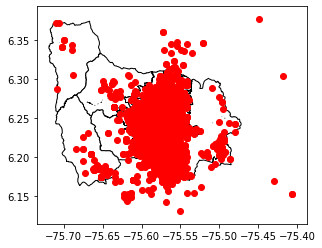

In [38]:
# Plotting all the points in the map
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

# Selecting the points located within the map

In [39]:
sectores_con_puntos_de_venta = gpd.sjoin(gdf_geom, sectores, how = "left", op = 'intersects')
sectores_con_puntos_de_venta_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

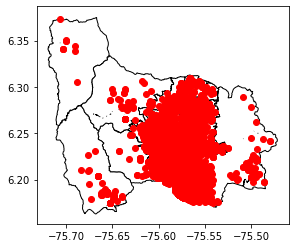

In [40]:
# Plotting the points within the map
ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

In [41]:
# Agregating a column to the original dataframe inidicating that the property is in Medellin
Medellin_Reales = np.zeros(df_B_M.shape[0])
for i in sectores_con_puntos_de_venta_Medellin.index:
    Medellin_Reales[i] = 1
df_B_M['Medellin Reales'] = Medellin_Reales

In [42]:
# Dividing the dataset into data that actually is in Medellin and data with missing coordinates
df_M = df_B_M.loc[df_B_M['medellin'] == 1]
df_M_imput = df_M.loc[df_M['lat'].isna()].copy()
df_M_reales = df_M.loc[df_M['Medellin Reales'] == 1]

In [43]:
df_M.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,medellin,Medellin Reales
0,4/23/2019,9/14/2018,6.250242,-75.588402,NaN,3.0,250,21.023370,Casa,221,1,1.0
2,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,134,19.519293,Casa,11,1,0.0
3,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,588,19.701615,Casa,11,1,0.0
4,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,160,20.125429,Casa,11,1,0.0
5,9/25/2018,9/14/2018,NaN,NaN,NaN,NaN,90,19.583832,Otro,11,1,0.0


# Coordinates Imputation

In [44]:
import random as rd
from random import uniform

# Data imputation
df_M_imput['lon'] = df_M_imput['lon'].apply(lambda x: uniform(-75.625,-75.54))
df_M_imput['lat'] = df_M_imput['lat'].apply(lambda x: uniform(6.302,6.20))

# Unifying the dataset 
df_M = df_M_imput.append(df_M_reales)
df_M.reset_index(inplace = True, drop = True)

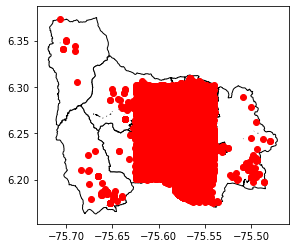

In [45]:
gdf_M = gpd.GeoDataFrame(df_M.copy(), geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})

ax = sectores.plot(color='white', edgecolor='black')
gdf_M.plot(ax = ax, color = 'red')

In [46]:
gdf_M.shape

(24880, 13)

# Selecting the points located within the map

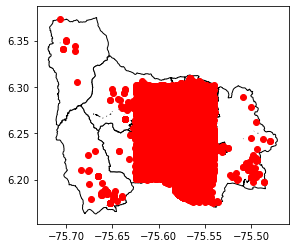

In [47]:
sectores_con_puntos_de_venta = gpd.sjoin(gdf_M, sectores, how = "left", op = 'intersects')
sectores_con_puntos_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_Medellin.plot(ax = ax, color = 'red')

In [48]:
sectores_con_puntos_Medellin.shape

(24880, 20)

# Filtering the dataset

In [49]:
Medellin_Reales = np.zeros(df_M.shape[0])

for i in sectores_con_puntos_Medellin.index:
    Medellin_Reales[i] = 1
df_M['Medellin for real'] = Medellin_Reales

df_M = df_M.loc[df_M['Medellin for real'] == 1]

#Eliminamos las columnas medellin y medellin reales ya que no son necesarias
df_M = df_M.drop(['medellin', 'Medellin Reales', 'Medellin for real'], axis = 1)

# Reorganizando el orden del dataset por preferencia propia
df_M = df_M.reindex(columns = ['created_on', 'end_date', 'delta_time', 'lon', 'lat', 'bedrooms', 'bathrooms', 'surface_total', 'property_type', 'price'])

In [50]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,property_type,price
0,9/14/2018,9/25/2018,11,-75.589157,6.214346,NaN,NaN,134,Casa,19.519293
1,9/14/2018,9/25/2018,11,-75.594444,6.219012,NaN,NaN,588,Casa,19.701615
2,9/14/2018,9/25/2018,11,-75.597485,6.243799,NaN,NaN,160,Casa,20.125429
3,9/14/2018,9/25/2018,11,-75.617490,6.252432,NaN,NaN,90,Otro,19.583832
4,9/14/2018,9/25/2018,11,-75.614636,6.240193,NaN,NaN,101,Otro,19.781657


# Encoding type of property

In [51]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(categories = 'auto')
df_M['property_type'] = le.fit_transform(df_M['property_type'])

In [52]:
df_M.property_type.unique()

array([1, 7, 0, 8, 6, 5, 3, 2, 4], dtype=int64)

In [53]:
out = ohe.fit_transform(df_M['property_type'].values[:,None])
out_array = out.toarray()
ohe_cols = []

for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    df_M[col_add] = out_array[:,int(category)]
    
df_M = df_M.drop(['property_type'],axis = 1)

In [54]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,Apartamento,Casa,Depósito,Finca,Local comercial,Lote,Oficina,Otro,Parqueadero
0,9/14/2018,9/25/2018,11,-75.589157,6.214346,NaN,NaN,134,19.519293,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/14/2018,9/25/2018,11,-75.594444,6.219012,NaN,NaN,588,19.701615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/14/2018,9/25/2018,11,-75.597485,6.243799,NaN,NaN,160,20.125429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/2018,9/25/2018,11,-75.617490,6.252432,NaN,NaN,90,19.583832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9/14/2018,9/25/2018,11,-75.614636,6.240193,NaN,NaN,101,19.781657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Encoding Districts

In [55]:
sectores_con_puntos_Medellin.head()

,end_date,created_on,lat,lon,bedrooms,bathrooms,surface_total,price,property_type,delta_time,medellin,Medellin Reales,geometry,index_right,OBJECTID,COMUNA,SECTOR,SHAPEAREA,SHAPELEN,NOMBRE
0,9/25/2018,9/14/2018,6.214346,-75.589157,NaN,NaN,134,19.519293,Casa,11,1,0.0,POINT (-75.58916 6.21435),2,3,15,6,7.336119e+06,12946.251605,GUAYABAL
1,9/25/2018,9/14/2018,6.219012,-75.594444,NaN,NaN,588,19.701615,Casa,11,1,0.0,POINT (-75.59444 6.21901),14,15,16,6,8.660176e+06,24766.651613,BELEN
2,9/25/2018,9/14/2018,6.243799,-75.597485,NaN,NaN,160,20.125429,Casa,11,1,0.0,POINT (-75.59749 6.24380),3,4,11,4,7.292277e+06,16610.401005,LAURELES
3,9/25/2018,9/14/2018,6.252432,-75.617490,NaN,NaN,90,19.583832,Otro,11,1,0.0,POINT (-75.61749 6.25243),8,9,12,4,4.143601e+06,14440.334581,LA AMERICA
4,9/25/2018,9/14/2018,6.240193,-75.614636,NaN,NaN,101,19.781657,Otro,11,1,0.0,POINT (-75.61464 6.24019),6,7,70,8,2.859133e+07,36770.000681,ALTAVISTA


In [56]:
sectores_con_puntos_Medellin.NOMBRE.unique()

array(['GUAYABAL', 'BELEN', 'LAURELES', 'LA AMERICA', 'ALTAVISTA',
       'SAN CRISTOBAL', 'EL POBLADO', 'BUENOS AIRES', 'ROBLEDO',
       'LA CANDELARIA', 'SANTA ELENA', 'SAN JAVIER', 'MANRIQUE',
       'POPULAR', 'SANTA CRUZ', 'CASTILLA', 'VILLA HERMOSA', 'ARANJUEZ',
       'DOCE DE OCTUBRE', 'SAN ANTONIO DE PRADO', 'PALMITAS'],
      dtype=object)

In [57]:
sectores_con_puntos_Medellin['NOMBRE'] = le.fit_transform(sectores_con_puntos_Medellin['NOMBRE'])

out = ohe.fit_transform(sectores_con_puntos_Medellin['NOMBRE'].values[:,None])
out_array = out.toarray()
ohe_cols = []

for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    df_M[col_add] = out_array[:,int(category)]

In [58]:
df_M.head()

,created_on,end_date,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,Apartamento,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
0,9/14/2018,9/25/2018,11,-75.589157,6.214346,NaN,NaN,134,19.519293,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9/14/2018,9/25/2018,11,-75.594444,6.219012,NaN,NaN,588,19.701615,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9/14/2018,9/25/2018,11,-75.597485,6.243799,NaN,NaN,160,20.125429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9/14/2018,9/25/2018,11,-75.617490,6.252432,NaN,NaN,90,19.583832,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9/14/2018,9/25/2018,11,-75.614636,6.240193,NaN,NaN,101,19.781657,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Variable Scaling

In [60]:
df_M.describe()

,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,Apartamento,Casa,Depósito,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
count,24880.000000,24880.000000,24880.000000,18201.000000,23890.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,...,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000
mean,79.640675,-75.582313,6.235166,3.418823,2.948556,352.825764,20.065462,0.433722,0.265354,0.000764,...,0.013063,0.000402,0.006230,0.039831,0.006069,0.027251,0.012420,0.004260,0.022990,0.014108
std,61.893212,0.020980,0.027869,1.262526,1.267281,2862.285063,0.609515,0.495598,0.441530,0.027625,...,0.113546,0.020045,0.078685,0.195566,0.077669,0.162817,0.110751,0.065134,0.149876,0.117937
min,0.000000,-75.706000,6.174774,1.000000,1.000000,10.000000,19.277648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-75.600725,6.214000,3.000000,2.000000,88.000000,19.583832,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,-75.582000,6.240000,3.000000,3.000000,128.000000,19.924758,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.000000,-75.566000,6.251143,4.000000,4.000000,207.000000,20.380776,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,510.000000,-75.479851,6.373000,27.000000,13.000000,198000.000000,22.249322,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - Clearly, the bedrooms, bathrooms and surface_total are variables 
   that are skewed to the right, due to the presence of outliers
 - We will scale the variables using logarithm in order to supress the
   effect of them, which will redistribute the variables as a pseduo-normal distribution

In [61]:
df_M['bedrooms'] = np.log(df_M['bedrooms'].values[:,None])
df_M['bathrooms'] = np.log(df_M['bathrooms'].values[:,None])
df_M['surface_total'] = np.log(df_M['surface_total'].values[:,None])

In [62]:
df_M.describe()

,delta_time,lon,lat,bedrooms,bathrooms,surface_total,price,Apartamento,Casa,Depósito,...,MANRIQUE,PALMITAS,POPULAR,ROBLEDO,SAN ANTONIO DE PRADO,SAN CRISTOBAL,SAN JAVIER,SANTA CRUZ,SANTA ELENA,VILLA HERMOSA
count,24880.000000,24880.000000,24880.000000,18201.000000,23890.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,...,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000,24880.000000
mean,79.640675,-75.582313,6.235166,1.173823,0.998183,5.010634,20.065462,0.433722,0.265354,0.000764,...,0.013063,0.000402,0.006230,0.039831,0.006069,0.027251,0.012420,0.004260,0.022990,0.014108
std,61.893212,0.020980,0.027869,0.330105,0.405209,0.822833,0.609515,0.495598,0.441530,0.027625,...,0.113546,0.020045,0.078685,0.195566,0.077669,0.162817,0.110751,0.065134,0.149876,0.117937
min,0.000000,-75.706000,6.174774,0.000000,0.000000,2.302585,19.277648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-75.600725,6.214000,1.098612,0.693147,4.477337,19.583832,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,-75.582000,6.240000,1.098612,1.098612,4.852030,19.924758,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.000000,-75.566000,6.251143,1.386294,1.386294,5.332719,20.380776,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,510.000000,-75.479851,6.373000,3.295837,2.564949,12.196022,22.249322,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Machine Learning - Initial Model

In [72]:
X_df = df_M.drop(columns = ['created_on', 'end_date', 'price']).copy()
Y_df = df_M['price'].copy()

In [73]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_df, Y_df, test_size = 0.2, random_state = 452)

In [74]:
# Avoid CopyWarning
X_train = X_train1.copy()
X_test = X_test1.copy()
Y_train = Y_train1.copy()
Y_test = Y_test1.copy()

# Imputation of Missing Values

In [75]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'mean')

X_train['bedrooms'] = imp.fit_transform(X_train['bedrooms'].values[:,None])
X_test['bedrooms'] = imp.fit_transform(X_test['bedrooms'].values[:,None])

X_train['bathrooms'] = imp.fit_transform(X_train['bathrooms'].values[:,None])
X_test['bathrooms'] = imp.fit_transform(X_test['bathrooms'].values[:,None])

# Using Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 2000, max_features =19)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=19, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [79]:
Y_test_estimate = rf.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {:.5f}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {:.5f}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {:.5f}".format(r2))

Root Mean Square Error (RMSE)= 0.06957
Mean Absolute Error (MAE)= 0.17882
R^2 = 0.81536


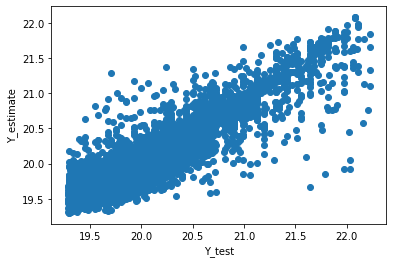

In [78]:
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()